# Rapid EDA 2.1 - Calories and Exercise *Revision*
---


## Imports and basic data cleaning
---

In [103]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 14

In [104]:
calories = pd.read_csv('data/calories-and-exercise/calories.csv')
exercise = pd.read_csv('data/calories-and-exercise/exercise.csv')

In [105]:
exercise_calories = exercise.merge(calories, on="User_ID")

In [106]:
exercise_calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [107]:
exercise_calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [108]:
ex_cal_clean = exercise_calories.drop(columns=['User_ID'])

In [109]:
# Convert to US customary system measurements
ex_cal_clean["Height_Inches"] = ex_cal_clean["Height"] / 2.56
ex_cal_clean["Weight_Lbs"] = ex_cal_clean["Weight"] / 2.20462
ex_cal_clean["Body_Temp_F"] = (9/5) * ex_cal_clean['Body_Temp'] + 32

ex_cal_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         15000 non-null  object 
 1   Age            15000 non-null  int64  
 2   Height         15000 non-null  float64
 3   Weight         15000 non-null  float64
 4   Duration       15000 non-null  float64
 5   Heart_Rate     15000 non-null  float64
 6   Body_Temp      15000 non-null  float64
 7   Calories       15000 non-null  float64
 8   Height_Inches  15000 non-null  float64
 9   Weight_Lbs     15000 non-null  float64
 10  Body_Temp_F    15000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB



## Exploratory Data Analysis
---

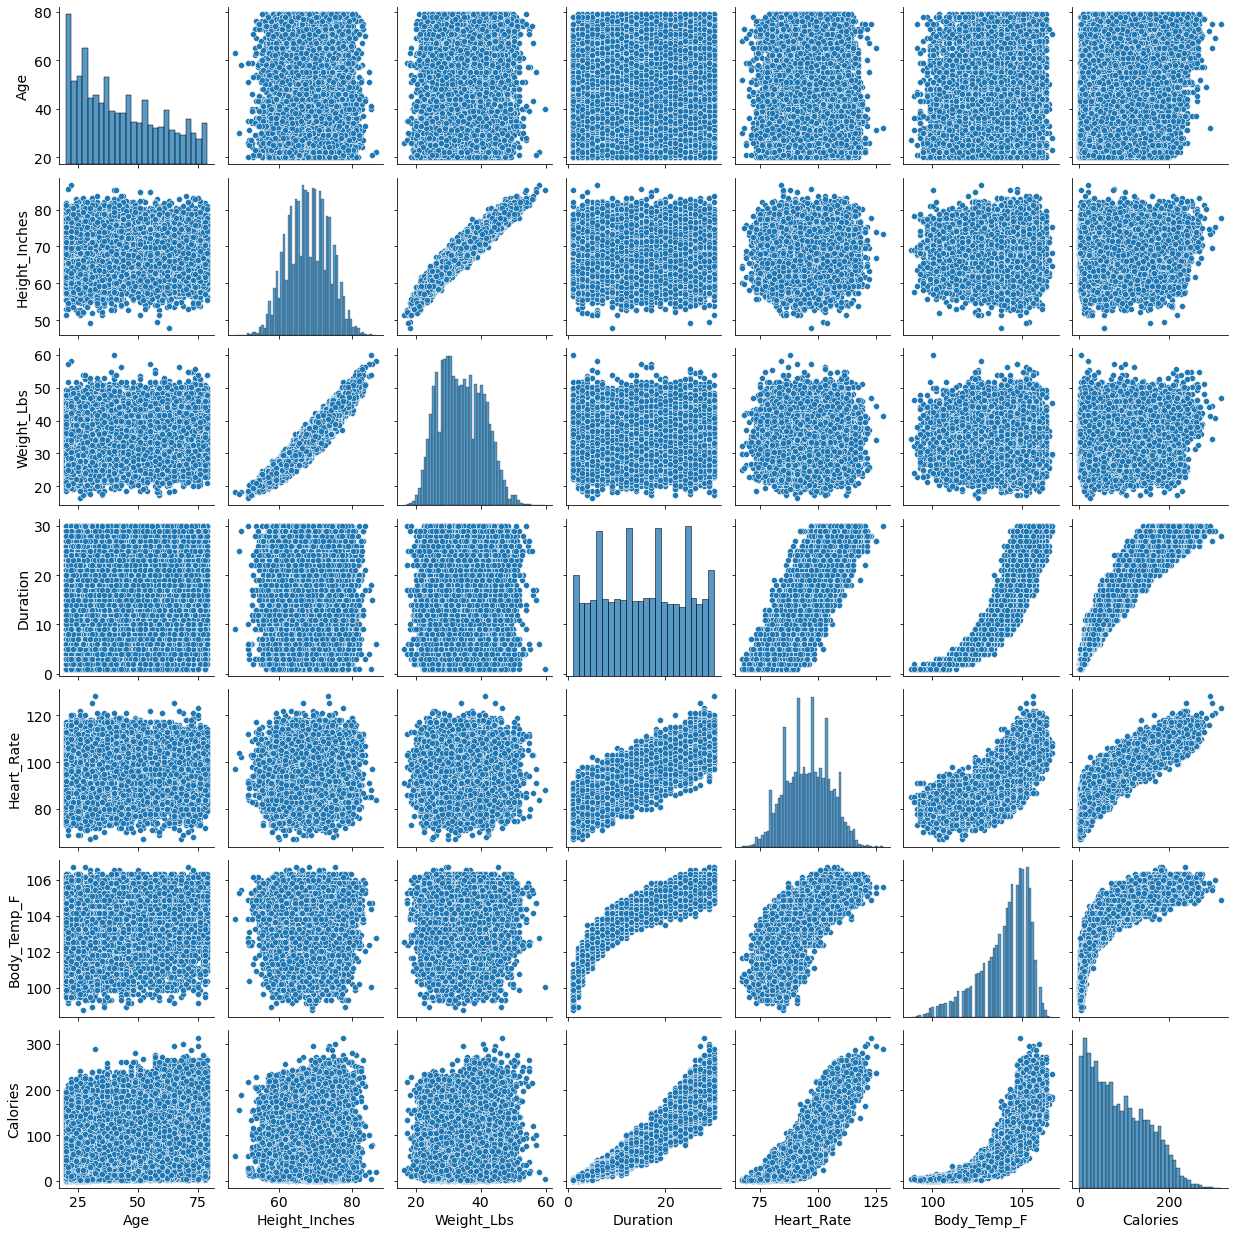

In [110]:
sns.pairplot(ex_cal_clean[['Age', 'Height_Inches', 'Weight_Lbs', 'Duration', 'Heart_Rate', 'Body_Temp_F', 'Calories']]);

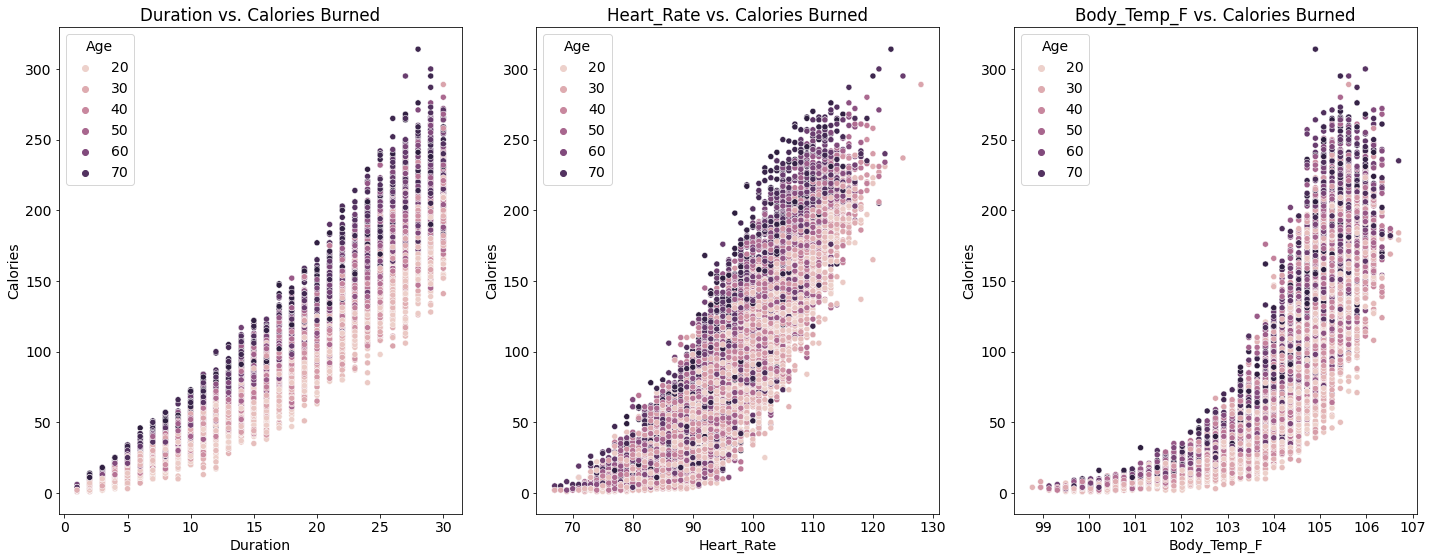

In [111]:
# Let's look closer at some of the plots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
n = 0
for col in ['Duration', 'Heart_Rate', 'Body_Temp_F']:
    sns.scatterplot(data=ex_cal_clean, x=col, y="Calories", hue="Age", ax=ax[n])
    ax[n].set_title(f"{col} vs. Calories Burned")
    n += 1
plt.tight_layout();

Duration, heart rate, and body temperature ($C\degree$) all have positive (maybe even exponential) correlations with calories burned. When stratified by age, it appears that older ages as a whole tend to have lower values for all three.

Let's stratify by gender as well.

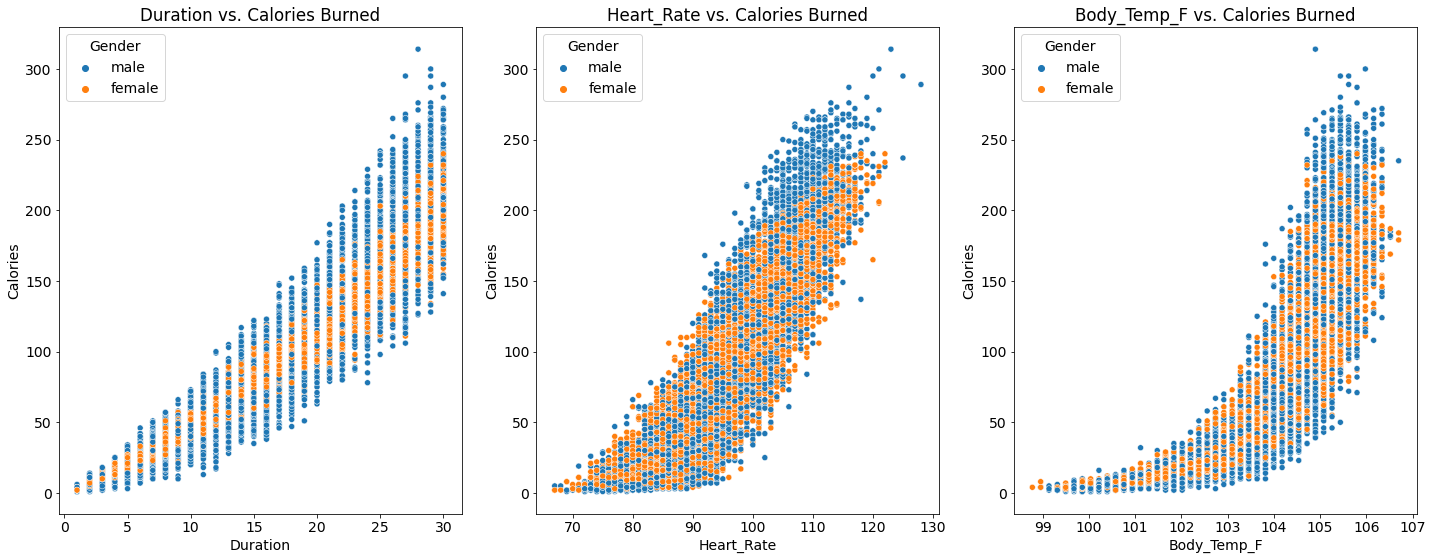

In [112]:
# Let's look closer at some of the plots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
n = 0
for col in ['Duration', 'Heart_Rate', 'Body_Temp_F']:
    sns.scatterplot(data=ex_cal_clean, x=col, y="Calories", hue="Gender", ax=ax[n])
    ax[n].set_title(f"{col} vs. Calories Burned")
    n += 1
plt.tight_layout();

There's much less of a clear pattern across genders, but it appears the range of duration values for females is a little bit less varied than those for men.

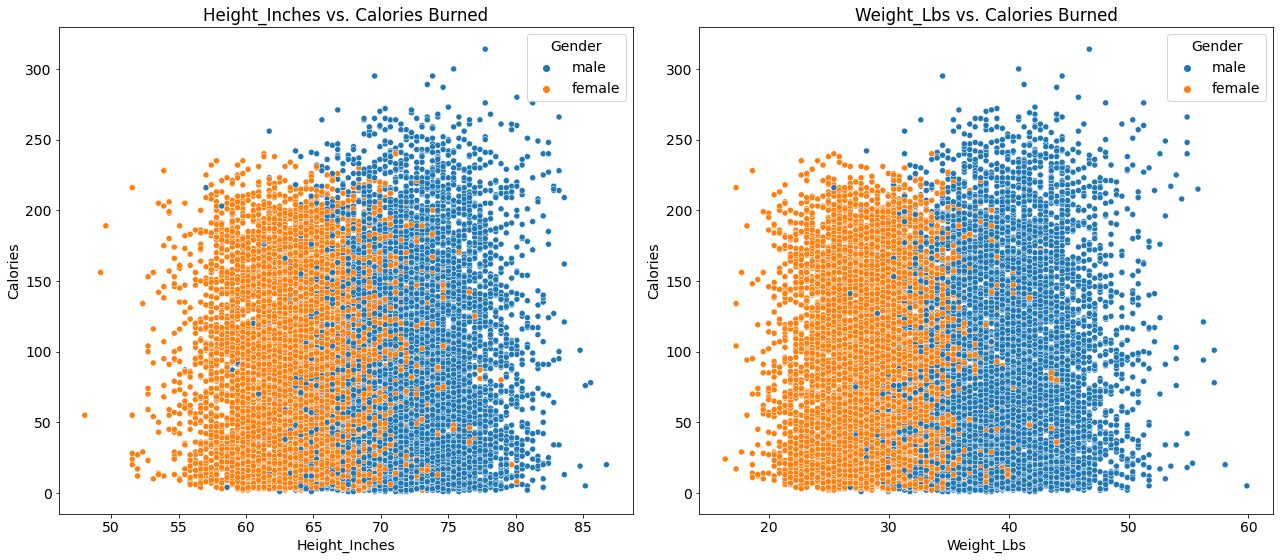

In [113]:
# What about height and weight?
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
n = 0
for col in ['Height_Inches', 'Weight_Lbs']:
    sns.scatterplot(data=ex_cal_clean, x=col, y="Calories", hue="Gender", ax=ax[n])
    ax[n].set_title(f"{col} vs. Calories Burned")
    n += 1
plt.tight_layout();

#### What is the average number of calories burned by each gender? Each age group by decade?

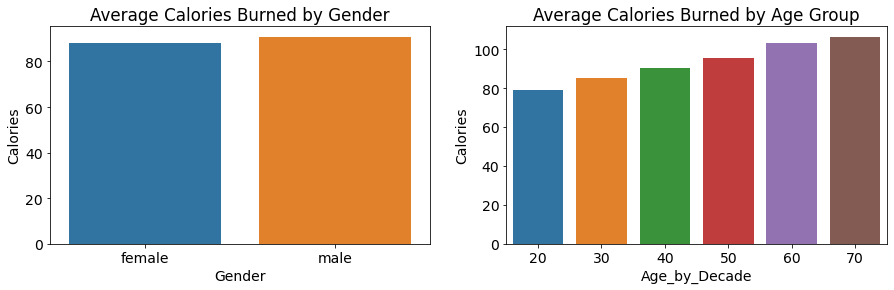

In [114]:
# Average calories burned by gender
cal_by_gender = ex_cal_clean.groupby('Gender')['Calories'].mean()

# Average calories burned by decade
ex_cal_clean['Age_by_Decade'] = (ex_cal_clean['Age'] // 10) * 10
cal_by_decade = ex_cal_clean.groupby('Age_by_Decade')['Calories'].mean()

fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.barplot(x=cal_by_gender.index, y=cal_by_gender, ax=ax[0])
ax[0].set_title("Average Calories Burned by Gender")
sns.barplot(x=cal_by_decade.index, y=cal_by_decade, ax=ax[1])
ax[1].set_title("Average Calories Burned by Age Group");

Interestingly enough, the average calories burned for each age group seems to trend upward as age increases. Is this due to duration of workout?

#### What is the average duration of a workout across age groups?

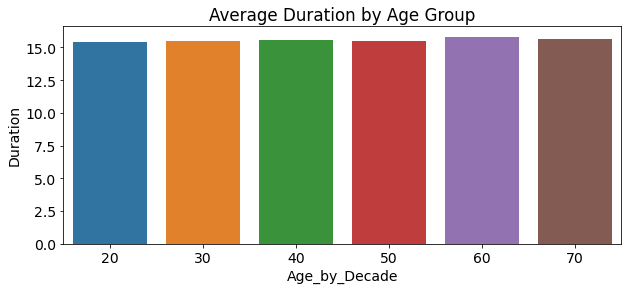

In [115]:
dur_by_decade = ex_cal_clean.groupby('Age_by_Decade')['Duration'].mean()
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x=dur_by_decade.index, y=dur_by_decade, ax=ax)
ax.set_title("Average Duration by Age Group");

It appears that the average duration across all ages is fairly uniform.

#### What is the probability distribution of all numerical columns?

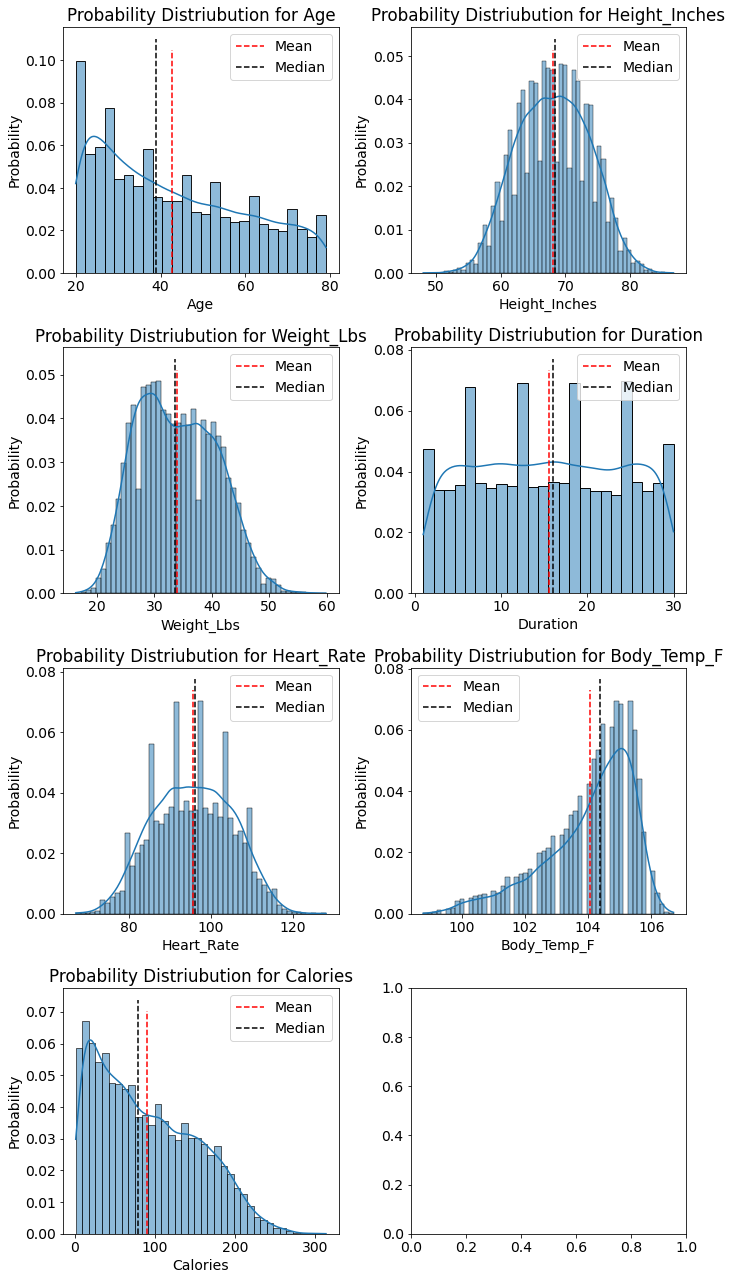

In [116]:
fig, ax = plt.subplots(4, 2, figsize=(10, 18))
n = 0
for col in ['Age', 'Height_Inches', 'Weight_Lbs', 'Duration', 'Heart_Rate', 'Body_Temp_F', 'Calories']:
    sns.histplot(data=ex_cal_clean, x=col, ax=ax[n // 2, n % 2], stat='probability', kde=True)
    ax[n // 2, n % 2].set_title(f'Probability Distriubution for {col}')
    ax[n // 2, n % 2].vlines(ex_cal_clean[col].mean(),
                            ymin=ax[n // 2, n % 2].get_ylim()[0],
                            ymax=ax[n // 2, n % 2].get_ylim()[1],
                            color='red',
                            ls='--',
                            label="Mean")
    ax[n // 2, n % 2].vlines(ex_cal_clean[col].median(),
                            ymin=ax[n // 2, n % 2].get_ylim()[0],
                            ymax=ax[n // 2, n % 2].get_ylim()[1],
                            color='black',
                            ls='--',
                            label="Median")
    ax[n // 2, n % 2].legend()
    n += 1

plt.tight_layout();

Several of these probability distributions have spikes every few values.